In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
os.chdir('/data/sha0w/pyPath/jupyterProjects/tmp/PyCharmProject')

In [3]:
# MNIST data prepare
import sys
import matplotlib.pyplot as plt
from mlxtend.data import loadlocal_mnist
# sys.path.append('data')
sys.path.append('/data/sha0w/hm02')
mnist_training_images, mnist_training_labels = loadlocal_mnist(
            images_path = 'data/train-images.idx3-ubyte',
            labels_path = 'data/train-labels.idx1-ubyte')

def MatrixToImage(data):
    data = data.reshape([28,28])
    plt.imshow(data, cmap=plt.cm.gray, interpolation='nearest')

MatrixToImage(mnist_training_images[1])

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
import keras as k

Using TensorFlow backend.


In [5]:
Y_train = mnist_training_labels
X_train = mnist_training_images
# normalization
X_train = X_train / 255.0
X_train = X_train.reshape(-1,28,28,1)
Y_train = to_categorical(Y_train, num_classes = 10)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=82)
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size = 0.5, random_state=82)


In [6]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)


In [7]:
# The accuracy curves with respect to different numbers of
# hidden notes and different numbers of hidden layers. In addition, you
# should give some deep comments on the experiments.
test_result_hidden_layer = dict()
for i in range(5) : 
    optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
    model = Sequential()
    for j in range(i + 1) :
        print(i + 1, "为本次测试的Conv Hidden layer数量")
        model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                         activation ='relu', input_shape = (28,28,1)))
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = "softmax"))
    # model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                                patience=3, 
                                                verbose=0, 
                                                factor=0.5, 
                                                min_lr=0.00001)
    # evaluate test accuracy
    batch_size=86
    history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                                  epochs = 10, validation_data = (X_val,Y_val),
                                  verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                                  , callbacks=[learning_rate_reduction])
    score = model.evaluate(X_test, Y_test, verbose=0)
    
    test_result_hidden_layer[i + 1] = (score, history)
    print(score, "为测试集上准确度")

1 为本次测试的Conv Hidden layer数量
Epoch 1/10
 - 13s - loss: 0.5817 - accuracy: 0.8160 - val_loss: 0.1168 - val_accuracy: 0.9675
Epoch 2/10
 - 8s - loss: 0.2598 - accuracy: 0.9223 - val_loss: 0.0785 - val_accuracy: 0.9778
Epoch 3/10
 - 8s - loss: 0.1973 - accuracy: 0.9406 - val_loss: 0.0762 - val_accuracy: 0.9767
Epoch 4/10
 - 8s - loss: 0.1713 - accuracy: 0.9475 - val_loss: 0.0742 - val_accuracy: 0.9757
Epoch 5/10
 - 8s - loss: 0.1510 - accuracy: 0.9540 - val_loss: 0.0647 - val_accuracy: 0.9823
Epoch 6/10
 - 8s - loss: 0.1357 - accuracy: 0.9582 - val_loss: 0.0641 - val_accuracy: 0.9805
Epoch 7/10
 - 8s - loss: 0.1335 - accuracy: 0.9612 - val_loss: 0.0641 - val_accuracy: 0.9812
Epoch 8/10
 - 8s - loss: 0.1267 - accuracy: 0.9631 - val_loss: 0.0558 - val_accuracy: 0.9847
Epoch 9/10
 - 8s - loss: 0.1255 - accuracy: 0.9632 - val_loss: 0.0561 - val_accuracy: 0.9838
Epoch 10/10
 - 8s - loss: 0.1168 - accuracy: 0.9660 - val_loss: 0.0464 - val_accuracy: 0.9870
[0.04102555873537333, 0.988111138343811]

/data/root/anaconda3/lib/python3.7/site-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
/data/root/anaconda3/lib/python3.7/site-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
/data/root/anaconda3/lib/python3.7/site-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
/data/root/anaconda3/lib/python3.7/site-packages/keras/callbacks/callbacks.py:1042: RuntimeWarnin

In [8]:
print(test_result_hidden_layer)

{1: ([0.04102555873537333, 0.988111138343811], <keras.callbacks.callbacks.History object at 0x7f12a811df28>), 2: ([0.02835367511883723, 0.9910740852355957], <keras.callbacks.callbacks.History object at 0x7f1284171fd0>), 3: ([0.0315573502073196, 0.9909259080886841], <keras.callbacks.callbacks.History object at 0x7f122413d240>), 4: ([0.027656907858241875, 0.9917407631874084], <keras.callbacks.callbacks.History object at 0x7f120421e0f0>), 5: ([0.0373342105108892, 0.9909259080886841], <keras.callbacks.callbacks.History object at 0x7f11c46b5dd8>)}


In [9]:
test_result_hidden_node = dict()
for i in range(5) : 
    filter_num = (i + 1) * 8
    optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
    model = Sequential()
    model.add(Conv2D(filters = filter_num, kernel_size = (5,5),padding = 'Same', 
                     activation ='relu', input_shape = (28,28,1)))
    model.add(Conv2D(filters = filter_num, kernel_size = (5,5),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(filters = filter_num * 2, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(Conv2D(filters = filter_num * 2, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = "softmax"))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                                patience=3, 
                                                verbose=1, 
                                                factor=0.5, 
                                                min_lr=0.00001)
    # evaluate test accuracy
    batch_size=86
    history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                                  epochs = 10, validation_data = (X_val,Y_val),
                                  verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                                  , callbacks=[learning_rate_reduction])
    score = model.evaluate(X_test, Y_test, verbose=0)
    
    test_result_hidden_node[(i + 1) * 8] = (score, history)
    print(score, "为测试集上准确度")

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 8)         208       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 8)         1608      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 16)        2320      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 16)         

/data/root/anaconda3/lib/python3.7/site-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
/data/root/anaconda3/lib/python3.7/site-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
/data/root/anaconda3/lib/python3.7/site-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
/data/root/anaconda3/lib/python3.7/site-packages/keras/callbacks/callbacks.py:1042: RuntimeWarnin

In [10]:
print(1)

1


[0.04102555873537333, 0.988111138343811]
1
[0.02835367511883723, 0.9910740852355957]
2
[0.0315573502073196, 0.9909259080886841]
3
[0.027656907858241875, 0.9917407631874084]
4
[0.0373342105108892, 0.9909259080886841]
5


/data/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


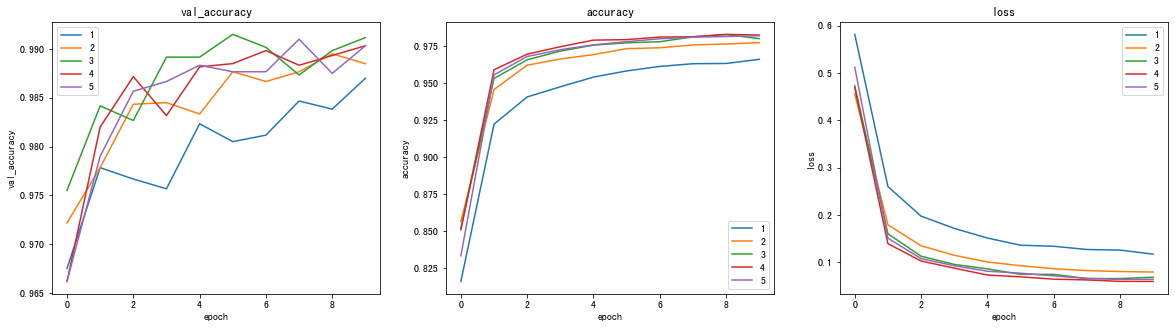

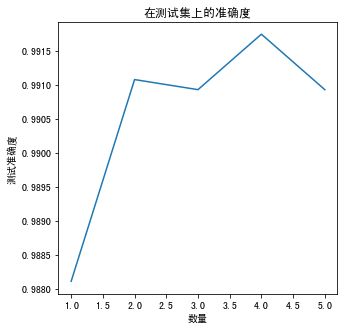

In [18]:
plt_x = []
plt_y = []
# plt.plot(x,y,"b--",linewidth=1)   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
fig = plt.figure(figsize=(20,5)) #创建绘图对象
for num,(acc, his) in test_result_hidden_layer.items() :
    print(acc)
    plt_x.append(acc[1])
    print(num)
    plt_y.append(int(num))
    i = 1
    for wi in ["val_accuracy", "accuracy", "loss"] : 
        ax = fig.add_subplot(1, 3, i)
        ax.set_title(wi)
        ax.set_xlabel("epoch")
        ax.set_ylabel(wi)
        ax.plot(his.epoch,his.history[wi],'-',label=num)
        i += 1
        ax.legend()
plt.show()
plt.figure(figsize=(5,5))
plt.plot(plt_y, plt_x,'-') #创建绘图对象
plt.title("在测试集上的准确度")
plt.xlabel("数量")
plt.ylabel("测试准确度")
plt.show()

[0.0501632284115724, 0.9842963218688965]
8
[0.028498800456040987, 0.9912962913513184]
16
[0.028616195814688345, 0.9912222027778625]
24
[0.02933349558923995, 0.9912592768669128]
32
[0.026746658136901073, 0.9920740723609924]
40


/data/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


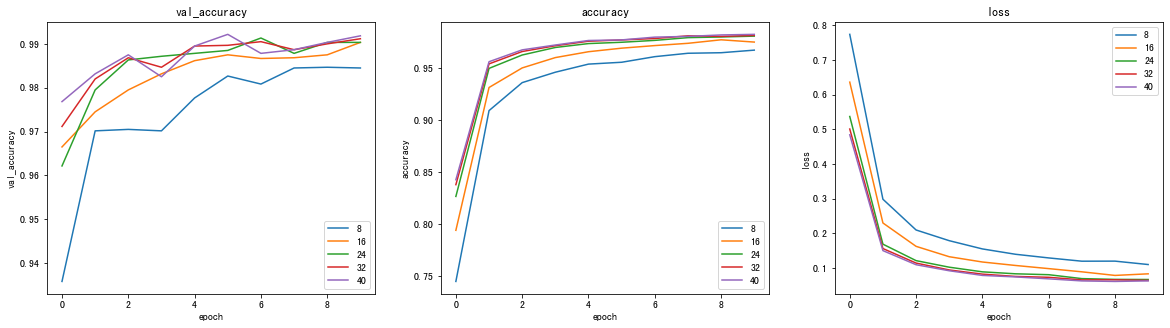

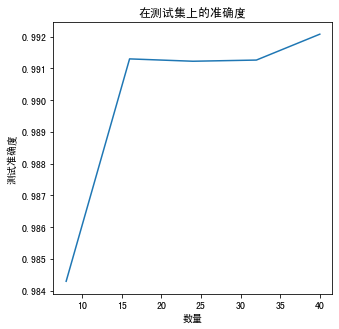

In [19]:
plt_x = []
plt_y = []
# plt.plot(x,y,"b--",linewidth=1)   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
fig = plt.figure(figsize=(20,5)) #创建绘图对象
for num,(acc, his) in test_result_hidden_node.items() : 
    print(acc)
    plt_x.append(acc[1])
    print(num)
    plt_y.append(int(num))
    i = 1
    for wi in ["val_accuracy", "accuracy", "loss"] : 
        ax = fig.add_subplot(1, 3, i)
        ax.set_title(wi)
        ax.set_xlabel("epoch")
        ax.set_ylabel(wi)
        ax.plot(his.epoch,his.history[wi],'-',label=num)
        i += 1
        ax.legend()
plt.show()
plt.figure(figsize=(5,5))
plt.plot(plt_y, plt_x,'-') #创建绘图对象
plt.title("在测试集上的准确度")
plt.xlabel("数量")
plt.ylabel("测试准确度")
plt.show()